# Gaming stocks price prediction based on price, volume and game premieres data

It is a first step into prediction based on outside-stock data, like political, social events or any event that isn't exactly stock-related but can have inpact on the prices. Ideally simillar approach would replace sentiment analysis and prediction based on investors' opinions as it would be better to react based on the events and not on peoples' approach to the events. This would basically lead to a greater, more fair investing, where the companies' market value would be better reflected in the price. 

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 18000)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

## Data preparation

In [2]:
BIT11_dates = [
    '24 kwietnia 2018',
    '14 listopada 2014',
    '20 sierpnia 2020',
    '29 maja 2018',
    '30 marca 2017',
    '8 kwietnia 2011',
    '27 sierpnia 2019',
    '15 maja 2013',
    '3 września 2019',
    '29 maja 2014',
    '16 listopada 2017',
    '28 maja 2018',
    '17 września 2014',
    '6 listopada 2013']

CDR_dates = [
    '17 września 2020',
    '18 maja 2015',
    '25 października 2016',
    '17 maja 2011',
    '23 października 2018',
    '26 października 2007',
    '27 listopada 2014',
    '22 stycznia 2015',
    '13 października 2015',
    '21 lipca 2021',
    '30 maja 2016']

CIGAMES_dates = [
    '22 listopada 2019',
    '4 czerwca 2021',
    '28 października 2014',
    '25 kwietnia 2017',
    '24 czerwca 2010',
    '12 marca 2013',
    '10 czerwca 2014',
    '24 września 2013',
    '29 lipca 2021',
    '23 lipca 2020',
    '21 października 2008',
    '10 listopada 2008',
    '30 września 2008',
    '13 czerwca 2008',
    '12 listopada 2010',
    '21 kwietnia 2011',
    '23 lutego 2009',
    '4 grudnia 2007',
    '19 sierpnia 2008',
    '27 marca 2007',
    '21 sierpnia 2009',
    '17 lutego 2009',
    '29 lipca 2008',
    '16 października 2009',
    '26 stycznia 2007',
    '1 czerwca 2007',
    '17 lipca 2009']

PLAYWAY_dates = [
    '28 lipca 2017',
    '18 marca 2021',
    '30 kwietnia 2019',
    '17 maja 2018',
    '9 listopada 2018',
    '20 lutego 2020',
    '6 czerwca 2019',
    '24 lutego 2017',
    '13 października 2017',
    '13 lutego 2019',
    '18 sierpnia 2021',
    '14 stycznia 2021',
    '19 czerwca 2015',
    '8 czerwca 2021',
    '15 stycznia 2021',
    '8 lipca 2021',
    '6 maja 2021',
    '16 kwietnia 2020',
    '25 marca 2021',
    '23 kwietnia 2015',
    '10 października 2019',
    '24 stycznia 2014',
    '20 maja 2021',
    '17 października 2019',
    '26 maja 2021',
    '15 czerwca 2020']

TEN_SQUARE_GAMES_dates = [
    '14 października 2015',
    '24 października 2017',
    '19 lipca 2017',
    '24 sierpnia 2020',
    '14 września 2020',
    '27 lipca 2020']

MOVIE_GAMES_dates = [
    '12 czerwca 2018',
    '11 marca 2021',
    '17 października 2019',
    '6 grudnia 2018',
    '16 kwietnia 2020',
    '13 lutego 2019',
    '3 lutego 2021',
    '14 grudnia 2017',
    '15 marca 2018',
    '25 maja 2018',
    '28 kwietnia 2021',
    '7 października 2020',
    '29 sierpnia 2017',
    '15 września 2021']

ONE_MORE_LEVEL_dates = [
    '27 października 2020',
    '18 kwietnia 2019',
    '11 listopada 2014',
    '30 czerwca 2016',
    '19 sierpnia 2015']


In [3]:
BIT11_dates = [x.split() for x in BIT11_dates]
CDR_dates = [x.split() for x in CDR_dates]
CIGAMES_dates = [x.split() for x in CIGAMES_dates]
PLAYWAY_dates = [x.split() for x in PLAYWAY_dates]
TEN_SQUARE_GAMES_dates = [x.split() for x in TEN_SQUARE_GAMES_dates]
MOVIE_GAMES_dates = [x.split() for x in MOVIE_GAMES_dates]
ONE_MORE_LEVEL_dates = [x.split() for x in ONE_MORE_LEVEL_dates]

In [4]:
BIT11_dates = pd.DataFrame(BIT11_dates, columns=['Day', 'Month', 'Year'])
CDR_dates = pd.DataFrame(CDR_dates, columns=['Day', 'Month', 'Year'])
CIGAMES_dates = pd.DataFrame(CIGAMES_dates, columns=['Day', 'Month', 'Year'])
PLAYWAY_dates = pd.DataFrame(PLAYWAY_dates, columns=['Day', 'Month', 'Year'])
TEN_SQUARE_GAMES_dates = pd.DataFrame(TEN_SQUARE_GAMES_dates, columns=['Day', 'Month', 'Year'])
MOVIE_GAMES_dates = pd.DataFrame(MOVIE_GAMES_dates, columns=['Day', 'Month', 'Year'])
ONE_MORE_LEVEL_dates = pd.DataFrame(ONE_MORE_LEVEL_dates, columns=['Day', 'Month', 'Year'])

In [5]:
BIT11_dates['Stock'] = '11B'
CDR_dates['Stock'] = 'CDR'
CIGAMES_dates['Stock'] = 'CIG'
PLAYWAY_dates['Stock'] = 'PLW'
TEN_SQUARE_GAMES_dates['Stock'] = 'TEN'
MOVIE_GAMES_dates['Stock'] = 'MOV'
ONE_MORE_LEVEL_dates['Stock'] = 'OML'

In [6]:
game_premieres = pd.DataFrame(columns=['Stock', 'Day', 'Month', 'Year'])

game_premieres = game_premieres.append([BIT11_dates, CDR_dates, CIGAMES_dates, PLAYWAY_dates, TEN_SQUARE_GAMES_dates, 
                                       MOVIE_GAMES_dates, ONE_MORE_LEVEL_dates])

In [7]:
game_premieres

Stock Day         Month  Year
0    11B  24      kwietnia  2018
1    11B  14     listopada  2014
2    11B  20      sierpnia  2020
3    11B  29          maja  2018
4    11B  30         marca  2017
5    11B   8      kwietnia  2011
6    11B  27      sierpnia  2019
7    11B  15          maja  2013
8    11B   3      września  2019
9    11B  29          maja  2014
10   11B  16     listopada  2017
11   11B  28          maja  2018
12   11B  17      września  2014
13   11B   6     listopada  2013
0    CDR  17      września  2020
1    CDR  18          maja  2015
2    CDR  25  października  2016
3    CDR  17          maja  2011
4    CDR  23  października  2018
5    CDR  26  października  2007
6    CDR  27     listopada  2014
7    CDR  22      stycznia  2015
8    CDR  13  października  2015
9    CDR  21         lipca  2021
10   CDR  30          maja  2016
0    CIG  22     listopada  2019
1    CIG   4       czerwca  2021
2    CIG  28  października  2014
3    CIG  25      kwietnia  2017
4    CIG  24       czerwca  2010
5    CIG  12         marca  2013
6    CIG  10       czerwca  2014
7    CIG  24      września  2013
8    CIG  29         lipca  2021
9    CIG  23         lipca  2020
10   CIG  21  października  2008
11   CIG  10     listopada  2008
12   CIG  30      września  2008
13   CIG  13       czerwca  2008
14   CIG  12     listopada  2010
15   CIG  21      kwietnia  2011
16   CIG  23        lutego  2009
17   CIG   4       grudnia  2007
18   CIG  19      sierpnia  2008
19   CIG  27         marca  2007
20   CIG  21      sierpnia  2009
21   CIG  17        lutego  2009
22   CIG  29         lipca  2008
23   CIG  16  października  2009
24   CIG  26      stycznia  2007
25   CIG   1       czerwca  2007
26   CIG  17         lipca  2009
0    PLW  28         lipca  2017
1    PLW  18         marca  2021
2    PLW  30      kwietnia  2019
3    PLW  17          maja  2018
4    PLW   9     listopada  2018
5    PLW  20        lutego  2020
6    PLW   6       czerwca  2019
7    PLW  24        lutego  2017
8    PLW  13  października  2017
9    PLW  13        lutego  2019
10   PLW  18      sierpnia  2021
11   PLW  14      stycznia  2021
12   PLW  19       czerwca  2015
13   PLW   8       czerwca  2021
14   PLW  15      stycznia  2021
15   PLW   8         lipca  2021
16   PLW   6          maja  2021
17   PLW  16      kwietnia  2020
18   PLW  25         marca  2021
19   PLW  23      kwietnia  2015
20   PLW  10  października  2019
21   PLW  24      stycznia  2014
22   PLW  20          maja  2021
23   PLW  17  października  2019
24   PLW  26          maja  2021
25   PLW  15       czerwca  2020
0    TEN  14  października  2015
1    TEN  24  października  2017
2    TEN  19         lipca  2017
3    TEN  24      sierpnia  2020
4    TEN  14      września  2020
5    TEN  27         lipca  2020
0    MOV  12       czerwca  2018
1    MOV  11         marca  2021
2    MOV  17  października  2019
3    MOV   6       grudnia  2018
4    MOV  16      kwietnia  2020
5    MOV  13        lutego  2019
6    MOV   3        lutego  2021
7    MOV  14       grudnia  2017
8    MOV  15         marca  2018
9    MOV  25          maja  2018
10   MOV  28      kwietnia  2021
11   MOV   7  października  2020
12   MOV  29      sierpnia  2017
13   MOV  15      września  2021
0    OML  27  października  2020
1    OML  18      kwietnia  2019
2    OML  11     listopada  2014
3    OML  30       czerwca  2016
4    OML  19      sierpnia  2015

In [8]:
months_dict = {'stycznia': 1,
              'lutego': 2,
              'marca': 3,
              'kwietnia': 4,
              'maja': 5,
              'czerwca': 6,
            
              'lipca': 7,
              'sierpnia': 8,
              'września': 9,
              'października': 10,
              'listopada': 11,
              'grudnia': 12}

In [9]:
game_premieres['Month'].replace(months_dict, inplace=True)

In [10]:
game_premieres

Stock Day  Month  Year
0    11B  24      4  2018
1    11B  14     11  2014
2    11B  20      8  2020
3    11B  29      5  2018
4    11B  30      3  2017
5    11B   8      4  2011
6    11B  27      8  2019
7    11B  15      5  2013
8    11B   3      9  2019
9    11B  29      5  2014
10   11B  16     11  2017
11   11B  28      5  2018
12   11B  17      9  2014
13   11B   6     11  2013
0    CDR  17      9  2020
1    CDR  18      5  2015
2    CDR  25     10  2016
3    CDR  17      5  2011
4    CDR  23     10  2018
5    CDR  26     10  2007
6    CDR  27     11  2014
7    CDR  22      1  2015
8    CDR  13     10  2015
9    CDR  21      7  2021
10   CDR  30      5  2016
0    CIG  22     11  2019
1    CIG   4      6  2021
2    CIG  28     10  2014
3    CIG  25      4  2017
4    CIG  24      6  2010
5    CIG  12      3  2013
6    CIG  10      6  2014
7    CIG  24      9  2013
8    CIG  29      7  2021
9    CIG  23      7  2020
10   CIG  21     10  2008
11   CIG  10     11  2008
12   CIG  30      9  2008
13   CIG  13      6  2008
14   CIG  12     11  2010
15   CIG  21      4  2011
16   CIG  23      2  2009
17   CIG   4     12  2007
18   CIG  19      8  2008
19   CIG  27      3  2007
20   CIG  21      8  2009
21   CIG  17      2  2009
22   CIG  29      7  2008
23   CIG  16     10  2009
24   CIG  26      1  2007
25   CIG   1      6  2007
26   CIG  17      7  2009
0    PLW  28      7  2017
1    PLW  18      3  2021
2    PLW  30      4  2019
3    PLW  17      5  2018
4    PLW   9     11  2018
5    PLW  20      2  2020
6    PLW   6      6  2019
7    PLW  24      2  2017
8    PLW  13     10  2017
9    PLW  13      2  2019
10   PLW  18      8  2021
11   PLW  14      1  2021
12   PLW  19      6  2015
13   PLW   8      6  2021
14   PLW  15      1  2021
15   PLW   8      7  2021
16   PLW   6      5  2021
17   PLW  16      4  2020
18   PLW  25      3  2021
19   PLW  23      4  2015
20   PLW  10     10  2019
21   PLW  24      1  2014
22   PLW  20      5  2021
23   PLW  17     10  2019
24   PLW  26      5  2021
25   PLW  15      6  2020
0    TEN  14     10  2015
1    TEN  24     10  2017
2    TEN  19      7  2017
3    TEN  24      8  2020
4    TEN  14      9  2020
5    TEN  27      7  2020
0    MOV  12      6  2018
1    MOV  11      3  2021
2    MOV  17     10  2019
3    MOV   6     12  2018
4    MOV  16      4  2020
5    MOV  13      2  2019
6    MOV   3      2  2021
7    MOV  14     12  2017
8    MOV  15      3  2018
9    MOV  25      5  2018
10   MOV  28      4  2021
11   MOV   7     10  2020
12   MOV  29      8  2017
13   MOV  15      9  2021
0    OML  27     10  2020
1    OML  18      4  2019
2    OML  11     11  2014
3    OML  30      6  2016
4    OML  19      8  2015

In [11]:
game_premieres['Date'] = pd.to_datetime(game_premieres[['Day', 'Month', 'Year']])

In [12]:
game_premieres = game_premieres.sort_values(['Stock', 'Date'])

In [13]:
# just to check if any premiere wasn't on a weekend, when the stock sessions are closed
game_premieres['WEEKEND'] = np.where(((game_premieres['Date']).dt.dayofweek) <= 5,0,1)

In [14]:
game_premieres

Stock Day  Month  Year       Date  WEEKEND
5    11B   8      4  2011 2011-04-08        0
7    11B  15      5  2013 2013-05-15        0
13   11B   6     11  2013 2013-11-06        0
9    11B  29      5  2014 2014-05-29        0
12   11B  17      9  2014 2014-09-17        0
1    11B  14     11  2014 2014-11-14        0
4    11B  30      3  2017 2017-03-30        0
10   11B  16     11  2017 2017-11-16        0
0    11B  24      4  2018 2018-04-24        0
11   11B  28      5  2018 2018-05-28        0
3    11B  29      5  2018 2018-05-29        0
6    11B  27      8  2019 2019-08-27        0
8    11B   3      9  2019 2019-09-03        0
2    11B  20      8  2020 2020-08-20        0
5    CDR  26     10  2007 2007-10-26        0
3    CDR  17      5  2011 2011-05-17        0
6    CDR  27     11  2014 2014-11-27        0
7    CDR  22      1  2015 2015-01-22        0
1    CDR  18      5  2015 2015-05-18        0
8    CDR  13     10  2015 2015-10-13        0
10   CDR  30      5  2016 2016-05-30        0
2    CDR  25     10  2016 2016-10-25        0
4    CDR  23     10  2018 2018-10-23        0
0    CDR  17      9  2020 2020-09-17        0
9    CDR  21      7  2021 2021-07-21        0
24   CIG  26      1  2007 2007-01-26        0
19   CIG  27      3  2007 2007-03-27        0
25   CIG   1      6  2007 2007-06-01        0
17   CIG   4     12  2007 2007-12-04        0
13   CIG  13      6  2008 2008-06-13        0
22   CIG  29      7  2008 2008-07-29        0
18   CIG  19      8  2008 2008-08-19        0
12   CIG  30      9  2008 2008-09-30        0
10   CIG  21     10  2008 2008-10-21        0
11   CIG  10     11  2008 2008-11-10        0
21   CIG  17      2  2009 2009-02-17        0
16   CIG  23      2  2009 2009-02-23        0
26   CIG  17      7  2009 2009-07-17        0
20   CIG  21      8  2009 2009-08-21        0
23   CIG  16     10  2009 2009-10-16        0
4    CIG  24      6  2010 2010-06-24        0
14   CIG  12     11  2010 2010-11-12        0
15   CIG  21      4  2011 2011-04-21        0
5    CIG  12      3  2013 2013-03-12        0
7    CIG  24      9  2013 2013-09-24        0
6    CIG  10      6  2014 2014-06-10        0
2    CIG  28     10  2014 2014-10-28        0
3    CIG  25      4  2017 2017-04-25        0
0    CIG  22     11  2019 2019-11-22        0
9    CIG  23      7  2020 2020-07-23        0
1    CIG   4      6  2021 2021-06-04        0
8    CIG  29      7  2021 2021-07-29        0
12   MOV  29      8  2017 2017-08-29        0
7    MOV  14     12  2017 2017-12-14        0
8    MOV  15      3  2018 2018-03-15        0
9    MOV  25      5  2018 2018-05-25        0
0    MOV  12      6  2018 2018-06-12        0
3    MOV   6     12  2018 2018-12-06        0
5    MOV  13      2  2019 2019-02-13        0
2    MOV  17     10  2019 2019-10-17        0
4    MOV  16      4  2020 2020-04-16        0
11   MOV   7     10  2020 2020-10-07        0
6    MOV   3      2  2021 2021-02-03        0
1    MOV  11      3  2021 2021-03-11        0
10   MOV  28      4  2021 2021-04-28        0
13   MOV  15      9  2021 2021-09-15        0
2    OML  11     11  2014 2014-11-11        0
4    OML  19      8  2015 2015-08-19        0
3    OML  30      6  2016 2016-06-30        0
1    OML  18      4  2019 2019-04-18        0
0    OML  27     10  2020 2020-10-27        0
21   PLW  24      1  2014 2014-01-24        0
19   PLW  23      4  2015 2015-04-23        0
12   PLW  19      6  2015 2015-06-19        0
7    PLW  24      2  2017 2017-02-24        0
0    PLW  28      7  2017 2017-07-28        0
8    PLW  13     10  2017 2017-10-13        0
3    PLW  17      5  2018 2018-05-17        0
4    PLW   9     11  2018 2018-11-09        0
9    PLW  13      2  2019 2019-02-13        0
2    PLW  30      4  2019 2019-04-30        0
6    PLW   6      6  2019 2019-06-06        0
20   PLW  10     10  2019 2019-10-10        0
23   PLW  17     10  2019 2019-10-17        0
5    PLW  20      2  2020 2020-02-20        0
17   PLW  16      4  2020 2020-04-16        0
2

In [15]:
directory = "Gaming data/"
stock_data = pd.DataFrame(columns=['Stock', 'Date', 'Open', 'Highest', 'Lowest', 'Close', 'Volume'])

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    single_stock_data = pd.read_csv(file_path)
    single_stock_data = single_stock_data.rename(columns={'Data': 'Date', 'Otwarcie': 'Open', 'Najwyzszy': 'Highest', 'Najnizszy': 'Lowest', 'Zamkniecie': 'Close', 'Wolumen': 'Volume'})
    single_stock_data['Date'] = pd.to_datetime(single_stock_data.Date)
    single_stock_data['Stock'] = filename[:3].upper()
    stock_data = stock_data.append(single_stock_data)
    print('Loaded file: ' + filename)

Loaded file: 11b_d.csv
Loaded file: cdr_d.csv
Loaded file: cig_d.csv
Loaded file: mov_d.csv
Loaded file: oml_d.csv
Loaded file: plw_d.csv
Loaded file: ten_d.csv


In [16]:
stock_data = stock_data.dropna()
stock_data = stock_data.reset_index(drop=True)

In [17]:
stock_data

Stock       Date      Open   Highest    Lowest     Close      Volume
0       11B 2010-10-28    3.7500    4.1800    3.4000    3.9500      207981
1       11B 2010-10-29    4.2500    5.3500    3.8000    5.1400      275534
2       11B 2010-11-02    5.4500    5.9900    4.8200    4.8600      118863
3       11B 2010-11-03    4.7400    5.0200    4.0000    4.3600       86129
4       11B 2010-11-04    4.4000    4.6500    4.3000    4.3500       16078
5       11B 2010-11-05    4.4100    4.5000    4.0900    4.0900       25349
6       11B 2010-11-08    4.1700    4.4900    4.0500    4.3700       23155
7       11B 2010-11-09    4.4000    4.6300    4.2200    4.5700       12548
8       11B 2010-11-10    4.5800    4.5900    4.4100    4.4200        2648
9       11B 2010-11-12    4.4300    5.0000    4.3500    5.0000       44096
10      11B 2010-11-15    5.2400    6.9700    5.2400    6.6900       80929
11      11B 2010-11-16    7.0000    8.2900    6.4000    7.4200       99349
12      11B 2010-11-17    7.5000    8.8000    7.5000    8.7000       69654
13      11B 2010-11-18    9.1700   11.0000    9.1300   11.0000      107167
14      11B 2010-11-19   11.7000   12.3000    8.9900    8.9900       90947
15      11B 2010-11-22    8.6200    9.8900    7.2000    8.5500       52023
16      11B 2010-11-23    8.4900    8.4900    7.5100    8.1200       11800
17      11B 2010-11-24    8.0000    9.5000    7.6500    8.4300       21951
18      11B 2010-11-25    8.6500    9.4400    8.3200    8.9000        5395
19      11B 2010-11-26    8.9000    9.2000    8.5500    8.7400        1809
20      11B 2010-11-29    8.9900    9.3000    8.5200    8.8100        7616
21      11B 2010-11-30    8.9000    8.9000    8.3300    8.6800        6158
22      11B 2010-12-01    8.9900   11.1800    8.5300   11.1800       50352
23      11B 2010-12-02   11.8000   12.3000   10.2000   11.5000       68913
24      11B 2010-12-03   11.5000   11.5000   10.0000   10.2000       25847
25      11B 2010-12-06   10.4000   10.7800    9.4000   10.5000       15847
26      11B 2010-12-07   10.4900   10.4900    9.3100    9.5000       10508
27      11B 2010-12-08    9.5500   10.0500    9.0500    9.7200        8708
28      11B 2010-12-09    9.7000    9.7000    9.2000    9.6400        5172
29      11B 2010-12-10    9.3200    9.4500    9.0000    9.3500        2635
30      11B 2010-12-13    9.3500    9.4000    9.0000    9.0000        4046
31      11B 2010-12-14    9.0500    9.2900    8.7000    8.8000        5935
32      11B 2010-12-15    9.2000   10.8100    8.7500    9.9500       23949
33      11B 2010-12-16   10.0500   10.0500    8.9500    9.0000       17191
34      11B 2010-12-17    9.0200    9.6900    8.7600    8.8100       14978
35      11B 2010-12-20    8.8100    8.8100    8.1100    8.4900       18420
36      11B 2010-12-21    8.1700    9.2000    8.1400    8.8400        7046
37      11B 2010-12-22    8.8400    8.8400    8.1300    8.3000        3732
38      11B 2010-12-23    8.3400    8.4500    8.1100    8.1900        6773
39      11B 2010-12-27    8.1200    8.1200    7.6000    7.7800        3967
40      11B 2010-12-28    7.7700    7.9600    7.1500    7.3500       12903
41      11B 2010-12-29    7.2900    7.3500    7.2000    7.3500        3627
42      11B 2010-12-30    7.3500    7.9000    7.3000    7.5100        4373
43      11B 2010-12-31    7.5100    7.7800    7.5100    7.5800        1007
44      11B 2011-01-03    7.3300    8.1900    7.3200    8.1900        3395
45      11B 2011-01-04    8.0000    9.5000    7.5600    8.9800        6649
46      11B 2011-01-05    8.7000    8.7000    8.1000    8.3000        1580
47      11B 2011-01-07    8.2100    8.5000    8.2100    8.4500        2490
48      11B 2011-01-10    8.4500    8.4500    7.8600    8.0200        2013
49      11B 2011-01-11    8.0200    8.0200    7.7000    7.9000        1573
50      11B 2011-01-12    8.0100    8.0500    8.0000    8.0100        1435
51      11B 2011-01-13    7.9000    8.2500    7.9000    8.1000         802
52      11B 2011-01-14    8.000

In [18]:
# adding info about premieres
for stock in stock_data['Stock'].unique():
    stock_data.loc[stock_data['Stock'] == stock, 'Premiere'] = stock_data.loc[stock_data['Stock'] == stock, 'Date'].isin(game_premieres.loc[game_premieres['Stock'] == stock, 'Date']).astype(int)

In [19]:
stock_data.loc[stock_data['Premiere'] == 1]
# some of the game premieres were before the company started at a stock market
# this results in diffrence in rows in game_premieres and stock_data with premiere == 1

Stock       Date      Open   Highest   Lowest     Close     Volume  \
112     11B 2011-04-08   24.4900   24.9000   23.620   24.0000       7780   
631     11B 2013-05-15   10.2500   10.5900   10.150   10.5400       1310   
752     11B 2013-11-06    9.5900   10.3000    9.500   10.3000       8796   
963     11B 2014-09-17   10.6800   10.7000   10.300   10.3000       4231   
1004    11B 2014-11-14    9.0800    9.6500    9.000    9.6200      10467   
1598    11B 2017-03-30  190.0000  190.0000  185.100  188.0000       6903   
1756    11B 2017-11-16  164.0000  164.7500  158.050  159.6000       8166   
1863    11B 2018-04-24  259.5000  268.0000  253.500  263.0000      59512   
1885    11B 2018-05-28  506.0000  509.0000  499.000  506.0000      14128   
1886    11B 2018-05-29  509.0000  510.0000  467.000  477.0000      35221   
2196    11B 2019-08-27  398.5000  403.0000  390.500  392.0000       2778   
2201    11B 2019-09-03  419.0000  429.0000  411.000  425.0000      10853   
2441    11B 2020-08-20  525.0000  532.0000  515.000  520.0000       4568   
5955    CDR 2007-10-26    4.4812    4.5289    4.119    4.1190   183001.0   
6845    CDR 2011-05-17    8.6002    8.6002    8.009    8.2092  2376566.0   
7728    CDR 2014-11-27   17.1150   17.1150   16.609   16.6850   110865.0   
7762    CDR 2015-01-22   15.3030   15.8270   15.303   15.5410   172584.0   
7841    CDR 2015-05-18   24.0180   24.6850   23.293   23.8350   911930.0   
7946    CDR 2015-10-13   25.8390   25.8390   25.381   25.6670    62500.0   
8100    CDR 2016-05-30   26.4590   26.8500   25.353   25.3530   319657.0   
8205    CDR 2016-10-25   37.7660   37.9570   37.681   37.7560    71155.0   
8704    CDR 2018-10-23  149.5500  149.5500  137.560  139.5900   931740.0   
9176    CDR 2020-09-17  390.7400  394.8300  385.690  392.6900   337940.0   
9385    CDR 2021-07-21  188.0000  194.2400  180.400  184.4800   415891.0   
9410    CIG 2007-12-04    9.8000   10.1000    9.210    9.3000      14050   
9538    CIG 2008-06-13   10.1000   10.1000   10.100   10.1000         14   
9570    CIG 2008-07-29    9.0400    9.0400    8.590    8.5900        629   
9584    CIG 2008-08-19    8.5900    8.7000    8.590    8.5900        293   
9614    CIG 2008-09-30    8.8900    8.8900    8.670    8.6700         34   
9628    CIG 2008-10-21    8.4700    8.4700    8.000    8.4700       1666   
9642    CIG 2008-11-10    7.3400    7.9700    7.340    7.9700       2058   
9706    CIG 2009-02-17    7.0000    7.0000    6.640    6.6400       1455   
9710    CIG 2009-02-23    7.1300    7.1300    6.950    7.1300       2347   
9810    CIG 2009-07-17    4.0400    4.0400    3.950    3.9500        696   
9835    CIG 2009-08-21    3.9200    5.0000    3.900    4.8800     181107   
9875    CIG 2009-10-16    3.8200    3.9300    3.820    3.9300        770   
10046   CIG 2010-06-24    5.4100    5.9500    4.870    5.4400     107888   
10145   CIG 2010-11-12   23.1100   23.9500   23.110   23.7600      39277   
10257   CIG 2011-04-21   29.5400   30.3800   29.200   30.0000      35527   
10729   CIG 2013-03-12   28.6100   28.6200   27.020   28.0000      57192   
10862   CIG 2013-09-24   17.3300   17.3300   16.720   17.0500       5450   
11036   CIG 2014-06-10   10.8500   11.2600   10.330   10.4000      92791   
11134   CIG 2014-10-28   11.4000   11.5000   10.800   10.9400     153060   
11756   CIG 2017-04-25    2.6100    2.6100    1.870    1.8800   17269475   
12399   CIG 2019-11-22    0.9250    0.9800    0.881    0.9280    5012828   
12563   CIG 2020-07-23    2.0000    2.0000    1.850    1.8520    2690214   
12779   CIG 2021-06-04    1.5870    1.6560    1.580    1.5890    2338332   
12818   CIG 2021-07-29    1.4000    1.4100    1.376    1.3900     544018   
12871   MOV 2019-02-13   26.5560   26.5560   22.167   26.0690        950   
13041   MOV 2019-10-17   33.8430   34.8380   32.847   33.3450       2701   
13161   MOV 2020-04-16   48.9720   53.3520   47.280   53.3520      38746   
13283   MOV 2020-10-07  102.5000  106.0000  102.000  1

In [20]:
def scale_data(data):
    list_of_features = []
    list_of_outputs = []
    for column in data.columns:
        list_of_features.append(data[column])
        if column in ['Open', 'Close', 'Highest', 'Lowest', 'Volume', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']:
            list_of_outputs.append(data[column])
        
    dataset = np.transpose(list_of_features)
    output_dataset = np.transpose(list_of_outputs)
    X_scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = X_scaler.fit_transform(dataset)
    Y_scaler = MinMaxScaler(feature_range=(0,1))
    Y_scaler.fit_transform(output_dataset)

    return scaled_data, X_scaler, Y_scaler

In [21]:
def prepare_input_and_output(data, number_of_sessions=60):
    # number_of_sessions - number of considered previous sessions as an input
    X = []
    Y = []
    for i in range(number_of_sessions, data.shape[0]):
        X.append(data[i-number_of_sessions:i, :])
        Y.append(data[i, :5])
    return X, Y

In [22]:
# Evaluation of the results is made on closing prices - it gives the most information about the usefullness of the model

def evaluate_results(X_valid, Y_valid, Y_scalers, predictions):

    predictions = Y_scalers[-1].inverse_transform(predictions)
    real_output = Y_scalers[-1].inverse_transform(Y_valid)

    predicted_data = pd.DataFrame(predictions, columns=['Open_predicted', 'Close_predicted', 'Highest_predicted', 'Lowest_predicted', 'Volume_predicted'])
    real_data = pd.DataFrame(real_output, columns=['Open_real', 'Close_real', 'Highest_real', 'Lowest_real', 'Volume_real'])
    predictions = pd.concat([real_data, predicted_data], axis=1)
    print(predictions[['Close_real', 'Close_predicted']].tail(20))

    predictions['Close_difference'] = abs(predictions['Close_real'] - predictions['Close_predicted'])
    predictions['Close_difference_percent'] = abs(predictions['Close_real'] - predictions['Close_predicted'])/predictions['Close_real'] * 100

    previous_close = predictions['Close_real'].shift(-1)
    Naive_forcast_MAPE = (abs(predictions['Close_real'] - previous_close)/predictions['Close_real'] * 100).mean()
    predictions_MAPE = predictions['Close_difference_percent'].mean()

    print('Naive forcast MAE: ' + str(round(abs(previous_close - predictions['Close_real']).mean(),2)))
    print('Predictions MAE: ' + str(round(predictions['Close_difference'].mean(),2)))
    print('Naive forcast MAPE: ' + str(round(Naive_forcast_MAPE,2)) + '%')
    print('Predictions MAPE: ' + str(round(predictions_MAPE,2)) + '%')
    
    return predictions

# Strategy on determining if premiere dates increase predictions accuracy
Firstly we train on all data without premiere dates as a first reference point<br>
Then we train on all data with premiere dates and see if accuracy has improved


As the number of days with premieres is vastly smaller than the number of days without premieres we also check only vectors that include premiere dates.<br>
We choose only vectors that have premiere date in them (59 days before and after any premiere) and see the results, accordingly as in the first step (with and without premieres included).

## Training on reference data - all data without premiere dates

In [23]:
scaled_stocks_reference = []
X_scalers_reference = []
Y_scalers_reference = []

for stock in stock_data['Stock'].unique():
    # Date, stock and quarters is dropped as it isn't considered for learning
    scaled_stock, X_scaler, Y_scaler = scale_data(stock_data.loc[stock_data['Stock'] == stock].drop(columns=['Stock', 'Date', 'Premiere']))
  
    scaled_stocks_reference.append(scaled_stock)
    X_scalers_reference.append(X_scaler)
    Y_scalers_reference.append(Y_scaler)

X_all_reference = []
Y_all_reference = []

for stock in scaled_stocks_reference:
    X, Y = prepare_input_and_output(stock, 60)
    X_all_reference = X_all_reference + X
    Y_all_reference = Y_all_reference + Y

X_all_reference, Y_all_reference = np.array(X_all_reference), np.array(Y_all_reference)
print('Shape of input matrix: ' + str(X_all_reference.shape))
print('Shape of output matrix: ' + str(Y_all_reference.shape))

Shape of input matrix: (16615, 60, 5)
Shape of output matrix: (16615, 5)


In [24]:
# We use data from Ten Square Games for validation
validation_set_size = stock_data.loc[stock_data['Stock'] == 'TEN', 'Date'].count() - 60
print("Validation set size: " + str(validation_set_size))
X_train_reference, X_valid_reference, Y_train_reference, Y_valid_reference = train_test_split(X_all_reference, Y_all_reference, test_size=validation_set_size, shuffle=False)

Validation set size: 759


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 24,925
Trainable params: 24,925
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
496/496 [==============================] - 6s 6ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 2/15
496/496 [==============================] - 2s 4ms/step - loss: 6.5667e-04 - val_loss: 0.0011
Epoch 3/15
496/496 [==============================] - 2s 4ms/step - loss: 5.6918e-04 - val_loss: 0.0010
Epoch 4/15
496/496 [==============================] - 2s 4ms/step - loss: 

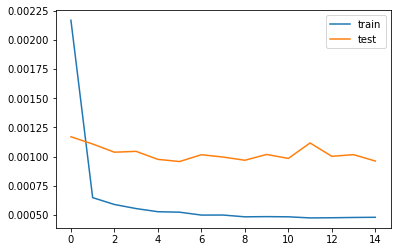

In [25]:
model_reference = Sequential()
model_reference.add(LSTM(64, input_shape=[X_train_reference.shape[1], X_train_reference.shape[2]]))#, return_sequences=True))
#model_reference.add(LSTM(64))
model_reference.add(Dense(100, activation='relu'))
model_reference.add(Dense(Y_train_reference.shape[1]))

model_reference.summary()

model_reference.compile(loss='mse', optimizer='adam')

history = model_reference.fit(X_train_reference, Y_train_reference, epochs=15, validation_data=(X_valid_reference, Y_valid_reference))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
predictions_reference = model_reference.predict(X_valid_reference)

predictions_reference = evaluate_results(X_valid_reference, Y_valid_reference, Y_scalers_reference, predictions_reference) # returns dataset

     Close_real  Close_predicted
739       535.5       544.832886
740       534.0       536.425842
741       530.5       534.480347
742       541.0       536.759155
743       547.5       546.901428
744       559.0       552.826477
745       562.0       563.034912
746       555.0       551.780640
747       552.5       560.659729
748       551.5       558.183960
749       550.0       553.528687
750       548.0       551.414734
751       538.0       541.603455
752       532.5       542.065430
753       531.0       530.662598
754       533.0       539.566406
755       529.0       525.835571
756       528.5       535.991150
757       524.0       527.872620
758       528.5       529.748108
Naive forcast MAE: 6.46
Predictions MAE: 5.85
Naive forcast MAPE: 2.24%
Predictions MAPE: 2.27%


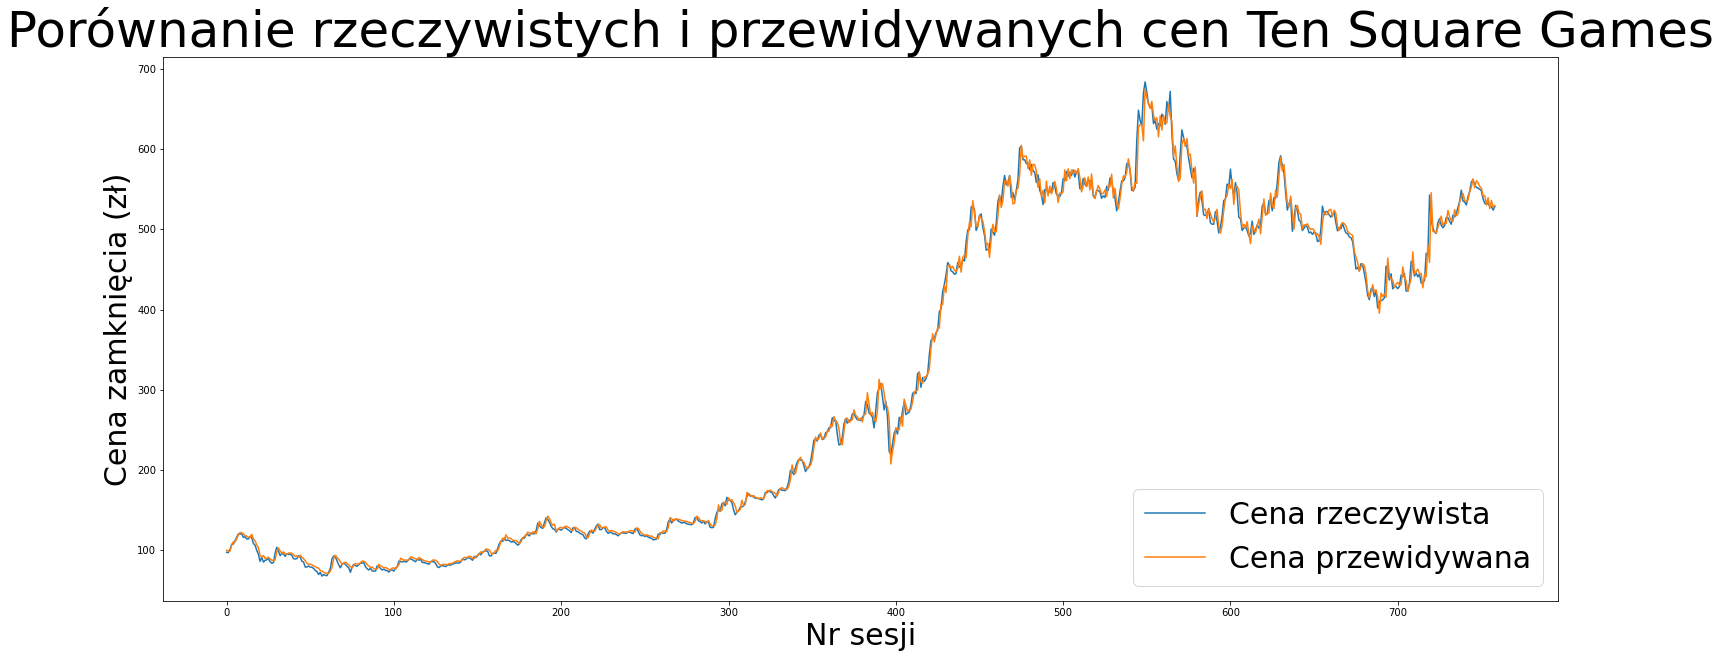

In [27]:
plt.figure(figsize=(25,10))
plt.title('Porównanie rzeczywistych i przewidywanych cen Ten Square Games', fontsize=50)
plt.xlabel('Nr sesji', fontsize=30)
plt.ylabel('Cena zamknięcia (zł)', fontsize=30)
plt.plot(predictions_reference['Close_real'])
plt.plot(predictions_reference['Close_predicted'])
plt.legend(['Cena rzeczywista',  'Cena przewidywana'], loc='lower right', fontsize=30)
plt.show()

## Training on all data with premiere dates

In [28]:
scaled_stocks_full = []
X_scalers_full = []
Y_scalers_full = []

for stock in stock_data['Stock'].unique():
    # Date, stock and quarters is dropped as it isn't considered for learning
    scaled_stock, X_scaler, Y_scaler = scale_data(stock_data.loc[stock_data['Stock'] == stock].drop(columns=['Stock', 'Date']))
  
    scaled_stocks_full.append(scaled_stock)
    X_scalers_full.append(X_scaler)
    Y_scalers_full.append(Y_scaler)

X_all_full = []
Y_all_full = []

for stock in scaled_stocks_full:
    X, Y = prepare_input_and_output(stock, 60)
    X_all_full = X_all_full + X
    Y_all_full = Y_all_full + Y

X_all_full, Y_all_full = np.array(X_all_full), np.array(Y_all_full)
print('Shape of input matrix: ' + str(X_all_full.shape))
print('Shape of output matrix: ' + str(Y_all_full.shape))

Shape of input matrix: (16615, 60, 6)
Shape of output matrix: (16615, 5)


In [29]:
# We use data from Ten Square Games for validation
validation_set_size = stock_data.loc[stock_data['Stock'] == 'TEN', 'Date'].count() - 60
print("Validation set size: " + str(validation_set_size))
X_train_full, X_valid_full, Y_train_full, Y_valid_full = train_test_split(X_all_full, Y_all_full, test_size=validation_set_size, shuffle=False)

Validation set size: 759


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 25,181
Trainable params: 25,181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
496/496 [==============================] - 3s 4ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 2/15
496/496 [==============================] - 2s 4ms/step - loss: 5.8769e-04 - val_loss: 0.0016
Epoch 3/15
496/496 [==============================] - 2s 4ms/step - loss: 5.6526e-04 - val_loss: 0.0010
Epoch 4/15
496/496 [==============================] - 2s 4ms/step - loss

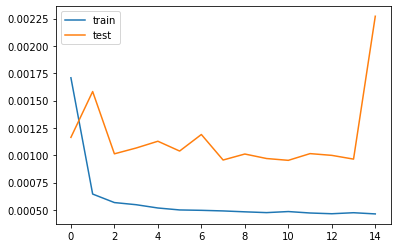

In [30]:
model_full = Sequential()
model_full.add(LSTM(64, input_shape=[X_train_full.shape[1], X_train_full.shape[2]]))#, return_sequences=True))
#model_full.add(LSTM(64))
model_full.add(Dense(100, activation='relu'))
model_full.add(Dense(Y_train_full.shape[1]))

model_full.summary()

model_full.compile(loss='mse', optimizer='adam')

history = model_full.fit(X_train_full, Y_train_full, epochs=15, validation_data=(X_valid_full, Y_valid_full))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [31]:
predictions_full = model_full.predict(X_valid_full)

predictions_full = evaluate_results(X_valid_full, Y_valid_full, Y_scalers_full, predictions_full) # returns dataset

     Close_real  Close_predicted
739       535.5       509.593445
740       534.0       501.045715
741       530.5       497.938324
742       541.0       501.039307
743       547.5       511.865875
744       559.0       516.419312
745       562.0       525.350098
746       555.0       514.976135
747       552.5       522.885193
748       551.5       520.821899
749       550.0       517.210999
750       548.0       513.609802
751       538.0       504.375183
752       532.5       505.755280
753       531.0       495.477997
754       533.0       503.169586
755       529.0       488.803406
756       528.5       498.635742
757       524.0       490.852783
758       528.5       492.958496
Naive forcast MAE: 6.46
Predictions MAE: 18.37
Naive forcast MAPE: 2.24%
Predictions MAPE: 4.94%


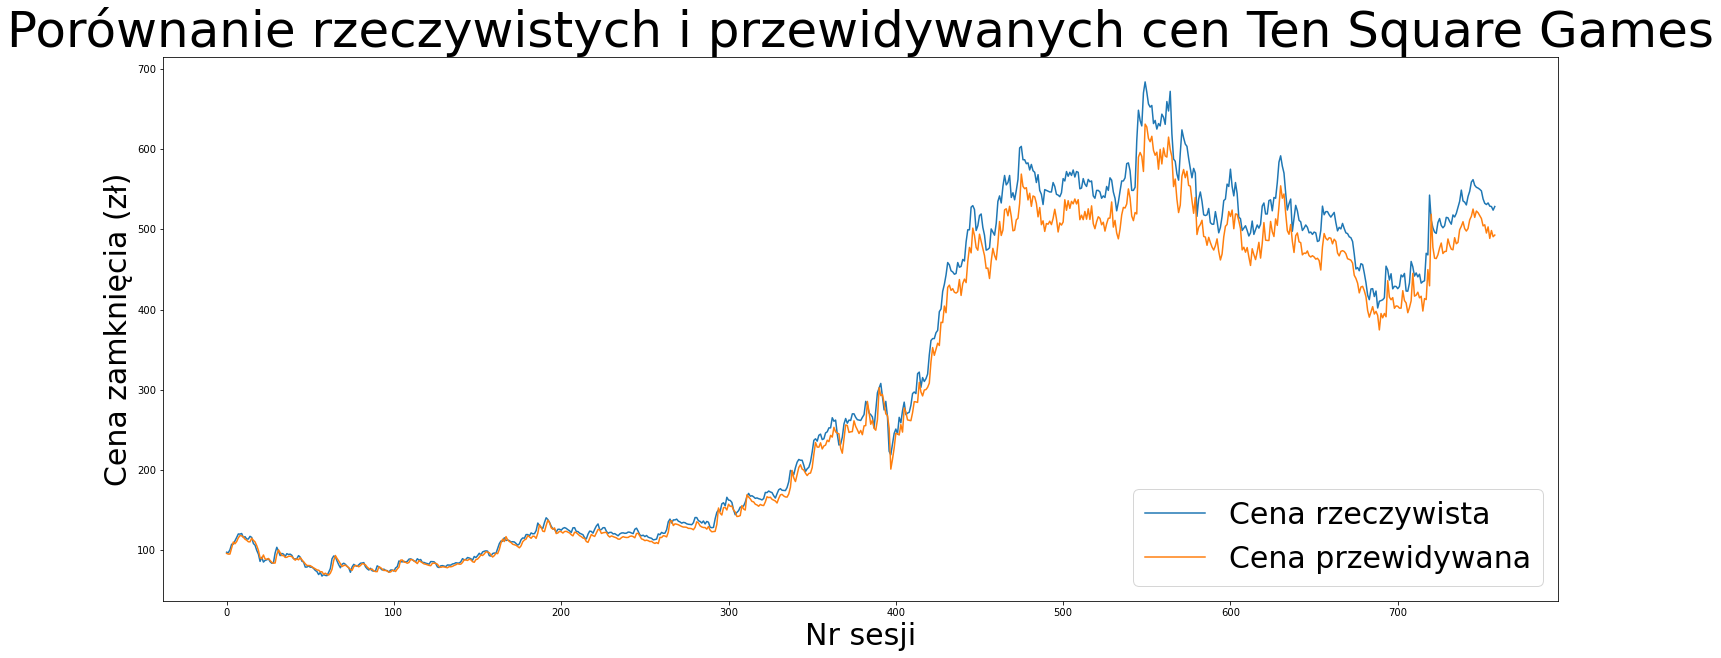

In [32]:
plt.figure(figsize=(25,10))
plt.title('Porównanie rzeczywistych i przewidywanych cen Ten Square Games', fontsize=50)
plt.xlabel('Nr sesji', fontsize=30)
plt.ylabel('Cena zamknięcia (zł)', fontsize=30)
plt.plot(predictions_full['Close_real'])
plt.plot(predictions_full['Close_predicted'])
plt.legend(['Cena rzeczywista',  'Cena przewidywana'], loc='lower right', fontsize=30)
plt.show()

## Training on subset of reference data - all data where premieres happend but not included in features

In [33]:
X_scalers_subset = []
Y_scalers_subset = []
X_all_subset = []
Y_all_subset = []

for stock in stock_data['Stock'].unique():
    for date in stock_data.loc[(stock_data['Premiere'] == 1) & (stock_data['Stock'] == stock), 'Date']:
        idx = stock_data.loc[(stock_data['Stock'] == stock) & (stock_data['Date'] == date)].index[0]
        period = stock_data.loc[idx-60:idx+59]
        scaled_period, X_scaler, Y_scaler = scale_data(period.drop(columns=['Stock', 'Date', 'Premiere']))
        X, Y = prepare_input_and_output(scaled_period)
        X_all_subset = X_all_subset + X
        Y_all_subset = Y_all_subset + Y
        X_scalers_subset.append(X_scaler)
        Y_scalers_subset.append(Y_scaler)

X_all_subset = np.array(X_all_subset)
Y_all_subset = np.array(Y_all_subset)
print('Shape of input matrix: ' + str(X_all_subset.shape))
print('Shape of output matrix: ' + str(Y_all_subset.shape))

Shape of input matrix: (5040, 60, 5)
Shape of output matrix: (5040, 5)


In [34]:
# We use data from Ten Square Games for validation (3 game premieres * 60 vectors give us 180 vectors)
validation_set_size = 180
print("Validation set size: " + str(validation_set_size))
X_train_subset, X_valid_subset, Y_train_subset, Y_valid_subset = train_test_split(X_all_subset, Y_all_subset, test_size=validation_set_size, shuffle=False)

Validation set size: 180


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 505       
Total params: 24,925
Trainable params: 24,925
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
152/152 [==============================] - 2s 6ms/step - loss: 0.0520 - val_loss: 0.0117
Epoch 2/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0107 - val_loss: 0.0109
Epoch 3/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0085
Epoch 4/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0092

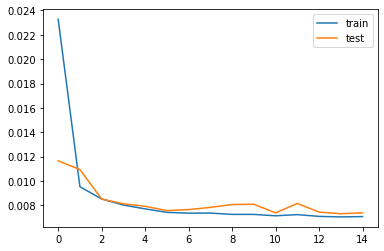

In [35]:
model_subset = Sequential()
model_subset.add(LSTM(64, input_shape=[X_train_subset.shape[1], X_train_subset.shape[2]]))#, return_sequences=True))
#model.add(LSTM(64))
model_subset.add(Dense(100, activation='relu'))
model_subset.add(Dense(Y_train_subset.shape[1]))

model_subset.summary()

model_subset.compile(loss='mse', optimizer='adam')

history_subset = model_subset.fit(X_train_subset, Y_train_subset, epochs=15, validation_data=(X_valid_subset, Y_valid_subset))

plt.plot(history_subset.history['loss'], label='train')
plt.plot(history_subset.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
predictions_subset = model_subset.predict(X_valid_subset)

predictions_subset = evaluate_results(X_valid_subset, Y_valid_subset, Y_scalers_subset, predictions_subset) # returns dataset

     Close_real  Close_predicted
160      672.06       646.290955
161      619.15       631.357544
162      587.80       595.740601
163      584.87       598.347961
164      569.19       580.237488
165      561.35       559.497803
166      594.66       563.410522
167      624.05       601.995178
168      614.26       614.765076
169      606.42       605.749756
170      603.48       611.786926
171      588.78       593.222717
172      576.05       594.163635
173      564.29       574.959534
174      576.05       559.145996
175      570.17       574.287781
176      516.29       530.786499
177      537.84       535.540466
178      546.66       546.741943
179      534.90       550.804138
Naive forcast MAE: 10.95
Predictions MAE: 7.88
Naive forcast MAPE: 1.8%
Predictions MAPE: 1.29%


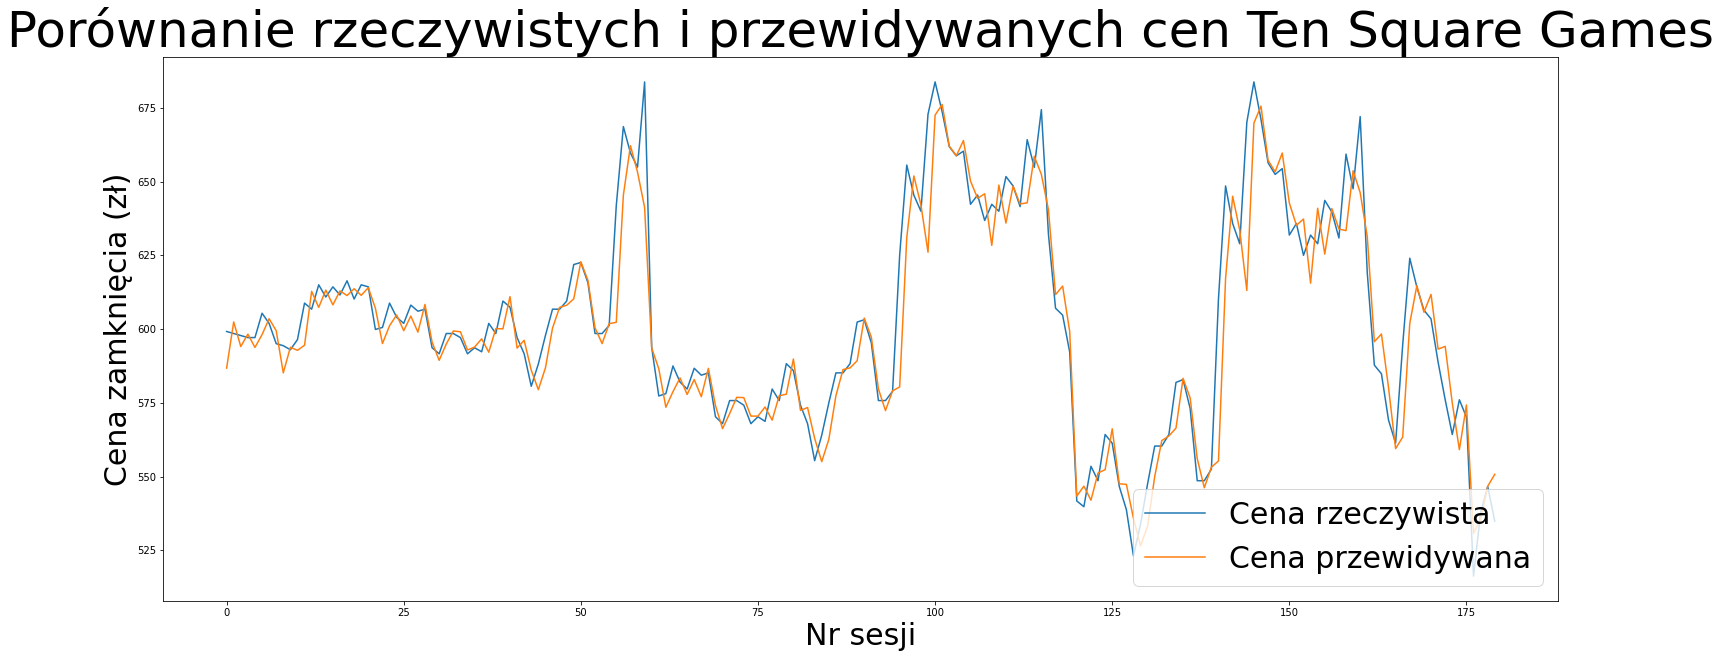

In [37]:
plt.figure(figsize=(25,10))
plt.title('Porównanie rzeczywistych i przewidywanych cen Ten Square Games', fontsize=50)
plt.xlabel('Nr sesji', fontsize=30)
plt.ylabel('Cena zamknięcia (zł)', fontsize=30)
plt.plot(predictions_subset['Close_real'])
plt.plot(predictions_subset['Close_predicted'])
plt.legend(['Cena rzeczywista',  'Cena przewidywana'], loc='lower right', fontsize=30)
plt.show()

## Training on subset of reference data with premieres included as features

In [38]:
X_scalers_premieres = []
Y_scalers_premieres = []
X_all_premieres = []
Y_all_premieres = []

for stock in stock_data['Stock'].unique():
    for date in stock_data.loc[(stock_data['Premiere'] == 1) & (stock_data['Stock'] == stock), 'Date']:
        idx = stock_data.loc[(stock_data['Stock'] == stock) & (stock_data['Date'] == date)].index[0]
        period = stock_data.loc[idx-60:idx+59]
        scaled_period, X_scaler, Y_scaler = scale_data(period.drop(columns=['Stock', 'Date']))
        X, Y = prepare_input_and_output(scaled_period)
        X_all_premieres = X_all_premieres + X
        Y_all_premieres = Y_all_premieres + Y
        X_scalers_premieres.append(X_scaler)
        Y_scalers_premieres.append(Y_scaler)

X_all_premieres = np.array(X_all_premieres)
Y_all_premieres = np.array(Y_all_premieres)
print('Shape of input matrix: ' + str(X_all_premieres.shape))
print('Shape of output matrix: ' + str(Y_all_premieres.shape))

Shape of input matrix: (5040, 60, 6)
Shape of output matrix: (5040, 5)


In [39]:
# We use data from Ten Square Games for validation (3 game premieres * 60 vectors give us 180 vectors)
validation_set_size = 180
print("Validation set size: " + str(validation_set_size))
X_train_premieres, X_valid_premieres, Y_train_premieres, Y_valid_premieres = train_test_split(X_all_premieres, Y_all_premieres, test_size=validation_set_size, shuffle=False)

Validation set size: 180


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 505       
Total params: 25,181
Trainable params: 25,181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
152/152 [==============================] - 2s 6ms/step - loss: 0.0435 - val_loss: 0.0121
Epoch 2/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 3/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 4/15
152/152 [==============================] - 1s 4ms/step - loss: 0.0076

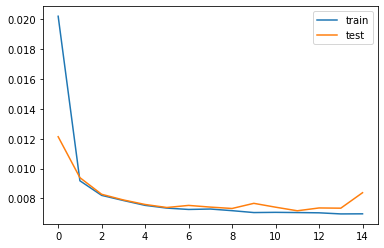

In [40]:
model_premieres = Sequential()
model_premieres.add(LSTM(64, input_shape=[X_train_premieres.shape[1], X_train_premieres.shape[2]]))#, return_sequences=True))
#model.add(LSTM(64))
model_premieres.add(Dense(100, activation='relu'))
model_premieres.add(Dense(Y_train_premieres.shape[1]))

model_premieres.summary()

model_premieres.compile(loss='mse', optimizer='adam')

history_premieres = model_premieres.fit(X_train_premieres, Y_train_premieres, epochs=15, validation_data=(X_valid_premieres, Y_valid_premieres))

plt.plot(history_premieres.history['loss'], label='train')
plt.plot(history_premieres.history['val_loss'], label='test')
plt.legend()
plt.show()

In [41]:
predictions_premieres = model_premieres.predict(X_valid_premieres)

predictions_premieres = evaluate_results(X_valid_premieres, Y_valid_premieres, Y_scalers_premieres, predictions_premieres) # returns dataset

     Close_real  Close_predicted
160      672.06       645.172974
161      619.15       631.221252
162      587.80       600.372559
163      584.87       602.266663
164      569.19       584.400635
165      561.35       562.622620
166      594.66       563.908203
167      624.05       601.844238
168      614.26       613.450500
169      606.42       604.378113
170      603.48       612.056274
171      588.78       592.826416
172      576.05       594.888733
173      564.29       576.724365
174      576.05       561.788269
175      570.17       573.513733
176      516.29       526.130981
177      537.84       532.303162
178      546.66       542.225464
179      534.90       547.887634
Naive forcast MAE: 10.95
Predictions MAE: 8.22
Naive forcast MAPE: 1.8%
Predictions MAPE: 1.34%


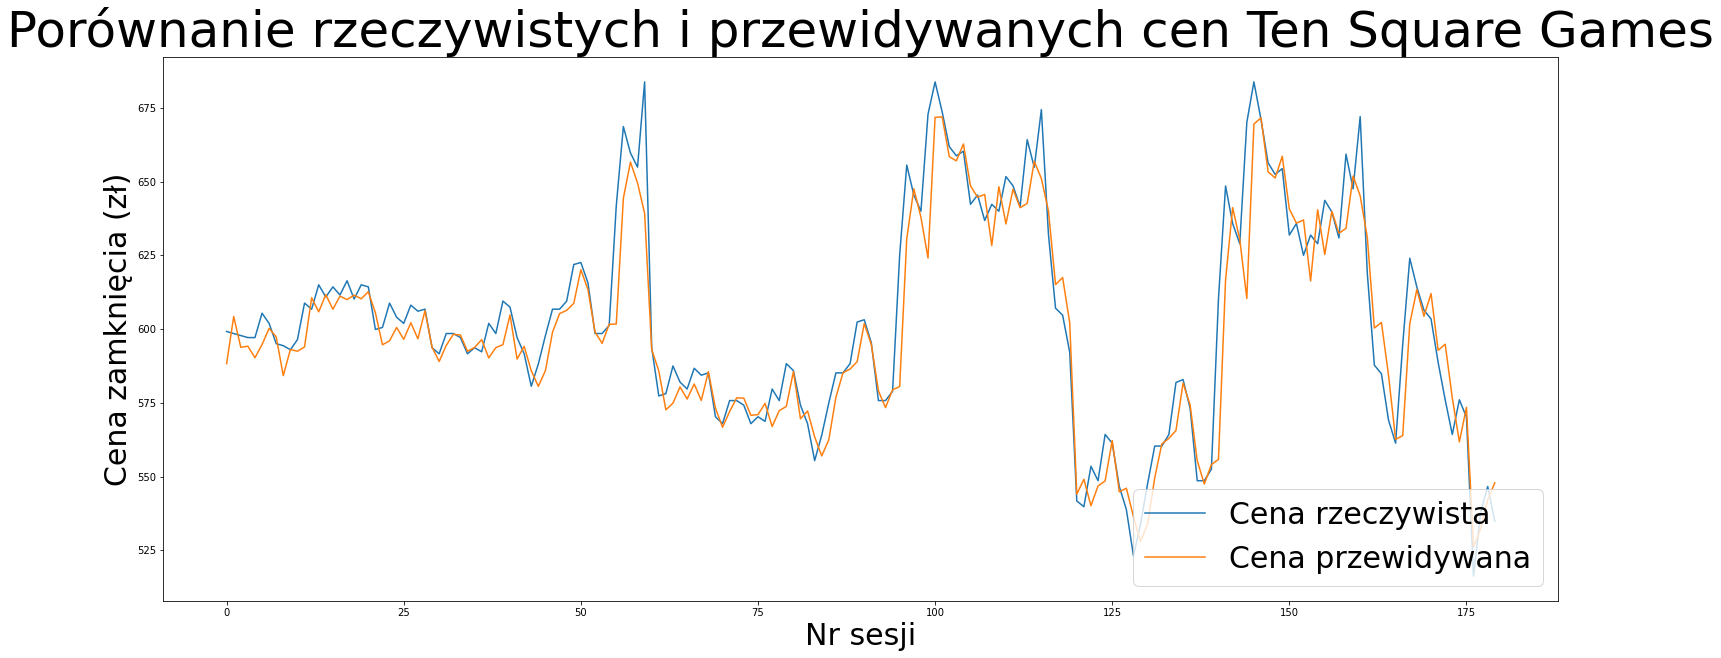

In [42]:
plt.figure(figsize=(25,10))
plt.title('Porównanie rzeczywistych i przewidywanych cen Ten Square Games', fontsize=50)
plt.xlabel('Nr sesji', fontsize=30)
plt.ylabel('Cena zamknięcia (zł)', fontsize=30)
plt.plot(predictions_premieres['Close_real'])
plt.plot(predictions_premieres['Close_predicted'])
plt.legend(['Cena rzeczywista',  'Cena przewidywana'], loc='lower right', fontsize=30)
plt.show()